<a href="https://colab.research.google.com/github/edgaracabral/PoDHackaton02_2023/blob/main/PoD%20FW%20Hackaton_02%2002%20FeatureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Lendo dados pós processo de data prep

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

# Redirecione para o folder on pod_academy_functions.py is localizado
%cd /content/drive/MyDrive/PoD Academy/modelos/Hackaton_DS_2023/PoD Framework
import pod_academy_functions as pod

/content/drive/MyDrive/PoD Academy/modelos/Hackaton_DS_2023/PoD Framework
-----------------------------------------------------
------------ PoD Academy Functions ------------------
Só Alegria!
Você está usando o pacote de funções da PoD Academy
Turma: 2023
Autor: PoD Academy
Professor: Bruno Jardim
Versão: 1.0.0
Data: 08/10/2023
-----------------------------------------------------
Atualização: 1.0.1
Aluno: Edgar Cabral
Data: 25/11/2023
-----------------------------------------------------


In [3]:
# Vá para o folder de dataprep
%cd /content/drive/MyDrive/PoD Academy/dados/Kaggle/Hackaton_DS_2023/dataprep

abt_00 = pd.read_csv('abt_train.csv')
abt_00.drop(axis=1,columns=['Unnamed: 0','id'],inplace=True)
abt_00.shape

/content/drive/MyDrive/PoD Academy/dados/Kaggle/Hackaton_DS_2023/dataprep


(150679, 228)

In [4]:
abt_00.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_INCOME_TYPE_State servant,NAME_INCOME_TYPE_Student,NAME_INCOME_TYPE_Unemployed,NAME_INCOME_TYPE_Working,FLAG_OWN_REALTY_Y,FLAG_OWN_CAR_Y,CODE_GENDER_M,CODE_GENDER_XNA,NAME_CONTRACT_TYPE_Revolving loans,target
0,-0.577795,-0.103326,0.271059,0.864546,0.319009,0.272835,0.998359,-0.460894,1.003091,-0.761866,...,-0.275573,-0.007287,-0.009289,-1.032565,0.662808,-0.72079,-0.722077,-0.002576,-0.3251,0
1,0.810437,0.187303,0.099882,0.282767,-0.241190,1.838198,0.822512,-0.451879,0.959652,0.936079,...,-0.275573,-0.007287,-0.009289,0.968462,0.662808,-0.72079,-0.722077,-0.002576,-0.3251,1
2,0.810437,-0.435473,-1.230301,-1.303511,-1.215451,1.082825,1.418004,-0.453537,1.177699,0.318825,...,-0.275573,-0.007287,-0.009289,0.968462,-1.508732,-0.72079,-0.722077,-0.002576,-0.3251,0
3,-0.577795,-0.518510,0.385643,0.631216,0.367722,-0.783151,1.561712,-0.456982,1.318237,1.637533,...,-0.275573,-0.007287,-0.009289,0.968462,-1.508732,-0.72079,-0.722077,-0.002576,-0.3251,0
4,0.810437,0.228821,-0.195039,-0.133453,-0.241190,-0.043280,0.191667,-0.466323,0.604191,-0.521860,...,-0.275573,-0.007287,-0.009289,-1.032565,-1.508732,-0.72079,-0.722077,-0.002576,-0.3251,1


In [6]:
X = abt_00.drop(axis=1,columns='target')
y = abt_00.target

print(X.shape)
print(y.shape)

# Treinar modelo com algoritmo Random Forest (Calma, não precisa focar no modelo neste momento)
clf = RandomForestClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
#clf = DecisionTreeClassifier() # troque aqui qual classificador quer utilizar: GradientBoostingClassifier, DecisionTreeClassifier
clf.fit(X, y)

(150679, 227)
(150679,)


RandomForestClassifier()

Número de features selecionadas:  14


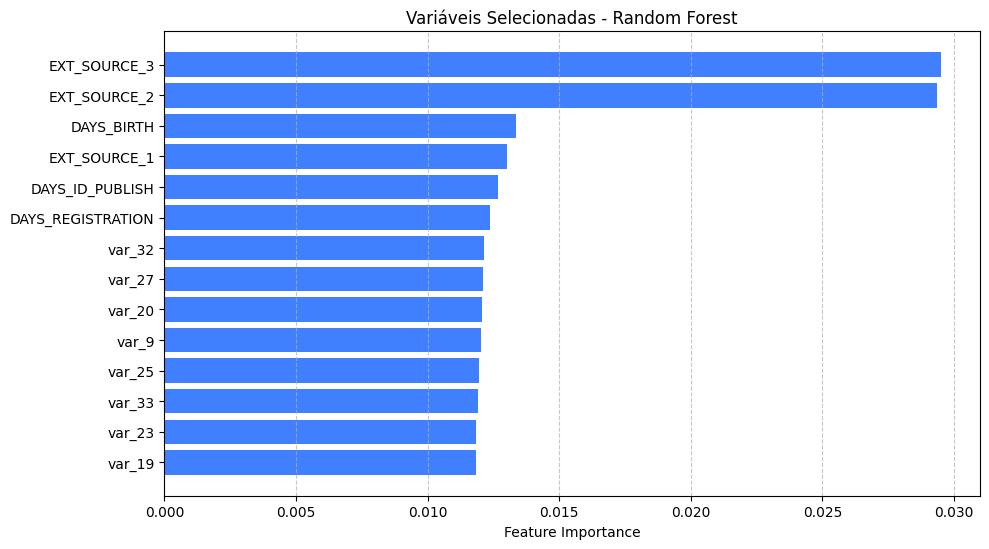

In [10]:
# Obter importância das variáveis
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=False)

# Estabelecer um limite de corte, por exemplo, x% da importância máxima
cutoff_maximp = 0.4

cutoff = cutoff_maximp * feature_importances.max()

# Selecionar variáveis acima do corte
selected_features = X.columns[feature_importances > cutoff].tolist()
print('Número de features selecionadas: ',len(selected_features))

# Ordenar variáveis por importância
features = features.sort_values(by='Importance', ascending=True)

# Filtrar o DataFrame para apenas as features acima do corte
selected_features_df = features[features['Importance'] > cutoff]

# Ajusta o tamanho da figura com base no número de features selecionadas
plt.figure(figsize=(10, len(selected_features_df)*0.4))

# Plota as features selecionadas
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel("Feature Importance")
plt.title("Variáveis Selecionadas - Random Forest")
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [11]:
# Salvar a lista em um arquivo .pkl
import pickle
with open('prd_list_features_hktn.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [12]:
# Carregar a lista do arquivo .pkl
with open('prd_list_features_hktn.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['DAYS_BIRTH', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'var_9', 'var_19', 'var_20', 'var_23', 'var_25', 'var_27', 'var_32', 'var_33']


In [13]:
lista_features = loaded_lista + ['target']
abt_01 = abt_00[lista_features]

abt_01.head()

,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,var_9,var_19,var_20,var_23,var_25,var_27,var_32,var_33,target
0,0.998359,1.003091,-0.761866,7.968324e-16,-1.403379,-5.570603e-01,-0.680269,-0.337587,0.682273,0.759220,-1.693492,1.575622,-1.333854,-0.874628,0
1,0.822512,0.959652,0.936079,-5.229922e-02,-0.326470,-1.343135e+00,0.116621,-1.634548,1.488908,0.030089,-0.273200,1.269079,-0.209847,-1.242235,1
2,1.418004,1.177699,0.318825,-1.084272e+00,-1.987551,8.331198e-01,0.270594,-0.341226,0.079495,0.700758,-1.462517,0.257007,-0.414458,1.134719,0
3,1.561712,1.318237,1.637533,-7.520486e-01,-0.744038,-6.362960e-16,0.470213,-0.118401,0.730988,-1.174065,0.579222,-0.047914,1.288448,-0.539561,0
4,0.191667,0.604191,-0.521860,-1.855960e+00,-1.033276,7.101683e-01,0.174832,0.983459,0.625493,-0.063790,1.656650,-0.850122,0.529869,0.409689,1


In [14]:
abt_test = pd.read_csv('abt_test.csv')
abt_test.drop(axis=1,columns=['Unnamed: 0','id'],inplace=True)
abt_test.shape

(64578, 228)

In [15]:
lista_features = loaded_lista + ['target']
abt_01_test = abt_test[lista_features]

abt_01_test.head()

,DAYS_BIRTH,DAYS_REGISTRATION,DAYS_ID_PUBLISH,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,var_9,var_19,var_20,var_23,var_25,var_27,var_32,var_33,target
0,1.473657,-1.187740,1.214111,-2.041489,0.633628,0.249757,-1.080309,-1.421002,1.372747,0.894762,-0.857447,1.580196,-0.604432,-0.314806,0
1,-0.942629,-1.494607,-0.315301,2.170305,-0.062028,-0.732458,-1.685454,-0.394911,1.688998,-0.935682,0.406940,-1.650257,1.132281,0.797990,0
2,1.002376,1.357274,-0.532746,0.009018,-1.226092,-1.216255,-1.381966,1.334534,0.538973,0.789665,-1.134692,-1.512824,-1.484236,-1.528937,1
3,1.369436,-0.252929,1.534976,-1.599968,-1.570416,0.260001,0.739692,-0.417283,1.302194,-0.272146,-0.425421,0.572549,1.457065,-1.067939,0
4,-0.099489,-0.989412,1.983789,0.582667,0.079345,-0.004241,-0.137838,-1.267700,0.105134,-0.771777,0.162521,-0.467105,-1.659460,-0.691809,0


In [16]:
# Salvando abt para treinamento dos modelos

abt_01.to_csv('abt_fs01_train.csv')
abt_01_test.to_csv('abt_fs01_test.csv')